In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
def shale_volume (GR , GRmax , GRmin):
    Vshale = (GR - GRmin) / (GRmax-GRmin)
    return round(Vshale,4)


shale_volume(120, 200, 15)



0.5676

In [3]:
def denisty_prosity (input_density, matrix_density, fluid_density) :
    dp=(matrix_density - input_density) / (matrix_density - fluid_density)
    return round (dp , 5)
denisty_prosity(2.45, 2.65, 1)

0.12121

In [4]:
def sw_archie (porosity, rt, rw, archieA, archieM, archieN):
    sw=((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return round(sw,4)
sw_archie(0.1, 10, 0.1, 1, 2, 2)

1.0

In [5]:
def sw_simandoux(phie, rt, rw, archieA, archieM, archieN, vshale, rshale):
    A = (1 - vshale) * archieA * rw / (phie ** archieM)
    B = A * vshale / (2 * rshale)
    C = A / rt
    
    sw = ((B **2 + C)**0.5 - B) **(2 / archieN)
    return sw
sw_simandoux(0.1, 10, 0.1, 1, 2, 2, 0.3, 2)

0.4627373132569206

In [6]:
df5=pd.read_csv('15_9-19.csv' ,header=0, skiprows=[1] )
print(df5.head())

       DEPTH   CALI  COAL       DT   DT_LOG       DTS   DTS_LOG      GR  \
0  3500.0183  9.315     0  76.7292  76.7292  157.1754  157.1754  36.621   
1  3500.1707  9.324     0  77.2473  77.2473  158.9566  158.9566  36.374   
2  3500.3231  9.338     0  77.8462  77.8462  159.7642  159.7642  30.748   
3  3500.4755  9.329     0  78.3571  78.3571  158.7547  158.7547  29.795   
4  3500.6279  9.328     0  78.6560  78.6560  157.1320  157.1320  27.346   

     NPHI    PHIE   PHIEC    PHIT   PHITC    RHOB  RHOB_LOG     RT      RW  \
0  0.1542  0.1122  0.1098  0.1209  0.1186  2.4602     2.460  1.791  0.0211   
1  0.1694  0.1074  0.1060  0.1159  0.1146  2.4680     2.468  1.756  0.0211   
2  0.1776  0.1082  0.1079  0.1127  0.1125  2.4730     2.473  1.720  0.0211   
3  0.1767  0.1254  0.1226  0.1292  0.1264  2.4471     2.447  1.696  0.0211   
4  0.1662  0.1278  0.1249  0.1299  0.1270  2.4460     2.446  1.697  0.0211   

      TEMP  
0  94.5855  
1  94.5897  
2  94.5940  
3  94.5982  
4  94.6025  


In [7]:
df5.replace(-999 , np.nan , inplace=True)

In [8]:
df5.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,3842.000000,3842.000000,3842.000000,3902.000000,3903.000000,3905.000000,3842.000000,3905.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,0.091753,0.123694,0.122504,2.448205,2.448222,7.325373,0.019713,102.852614
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,0.072675,0.071207,0.070314,0.126630,0.126652,38.090478,0.000748,4.774848
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,0.010000,0.010000,0.010000,1.991100,1.991000,0.075000,0.018500,94.585500
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,0.031200,0.062200,0.061925,2.362025,2.362000,1.558100,0.019100,98.719100
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,0.068800,0.115450,0.114400,2.466900,2.467000,2.081000,0.019700,102.852600
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,0.142400,0.177625,0.174200,2.551000,2.551000,4.500000,0.020400,106.986200
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,0.338500,0.418900,0.380300,3.019400,3.020000,1920.751000,0.021100,111.119700


(0.0, 250.0)

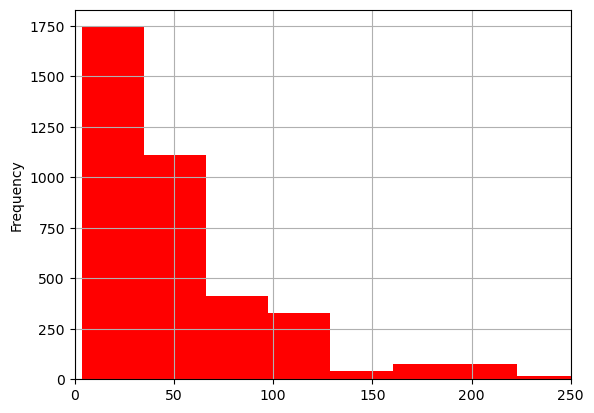

In [9]:
df5["GR"].plot(kind="hist", bins=50 , color="red")
plt.grid()
plt.xlim(0,250)

In [10]:
#calculate the shale volume from the data set using metoud above 
df5['VSHALE'] = shale_volume(df5['GR'], df5['GR'].quantile(q=0.99),
                             df5['GR'].quantile(q=0.01))

In [11]:
df5['PHI'] = denisty_prosity(df5['RHOB'], 2.65, 1)

In [12]:
df5['PHIECALC'] =df5['PHI'] - (df5['VSHALE'] * 0.3)

In [13]:
df5.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP,VSHALE,PHI,PHIECALC
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,...,3842.000000,3842.000000,3902.000000,3903.000000,3905.000000,3842.000000,3905.000000,3817.000000,3902.000000,3814.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,...,0.123694,0.122504,2.448205,2.448222,7.325373,0.019713,102.852614,0.217976,0.122300,0.057599
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,...,0.071207,0.070314,0.126630,0.126652,38.090478,0.000748,4.774848,0.298183,0.076745,0.108768
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,...,0.010000,0.010000,1.991100,1.991000,0.075000,0.018500,94.585500,-0.026400,-0.223880,-2.274590
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,...,0.062200,0.061925,2.362025,2.362000,1.558100,0.019100,98.719100,0.071800,0.060000,0.002763
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,...,0.115450,0.114400,2.466900,2.467000,2.081000,0.019700,102.852600,0.135600,0.110970,0.041630
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,...,0.177625,0.174200,2.551000,2.551000,4.500000,0.020400,106.986200,0.278200,0.174533,0.105815
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,...,0.418900,0.380300,3.019400,3.020000,1920.751000,0.021100,111.119700,7.485800,0.399330,0.308360


In [14]:
#Calculate Archie SW
df5['SW'] = sw_archie(df5['PHI'], df5['RT'], df5['RW'], 1, 2, 2)

In [15]:
#Calculate Simandoux SW
df5['SW_SIM'] = sw_simandoux(df5['PHIECALC'], df5['RT'], df5['RW'], 1, 2, 2, df5['VSHALE'],2)


In [16]:
#Limit SW to 1
df5['SW_LIM'] = df5['SW'].mask(df5['SW']>1, 1)
df5['SW__SIM_LIM'] = df5['SW_SIM'].mask(df5['SW_SIM']>1, 1)

In [17]:
df5.describe()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,...,RT,RW,TEMP,VSHALE,PHI,PHIECALC,SW,SW_SIM,SW_LIM,SW__SIM_LIM
count,4101.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3817.000000,3904.000000,3842.000000,...,3905.000000,3842.000000,3905.000000,3817.000000,3902.000000,3814.000000,3842.000000,3768.000000,3842.000000,3768.000000
mean,3812.438300,8.782929,0.0,80.918894,80.918894,150.556435,150.556435,54.641506,0.213049,0.092930,...,7.325373,0.019713,102.852614,0.217976,0.122300,0.057599,2.109016,1.720935,0.787411,0.830682
std,180.441761,0.535479,0.0,14.104999,14.104999,34.903100,34.903100,62.073152,0.370567,0.073644,...,38.090478,0.000748,4.774848,0.298183,0.076745,0.108768,32.549021,1.519878,0.311742,0.315212
min,3500.018300,6.883000,0.0,58.604200,58.604200,112.136400,112.136400,3.761000,0.055000,0.010000,...,0.075000,0.018500,94.585500,-0.026400,-0.223880,-2.274590,0.020700,0.005768,0.020700,0.005768
25%,3656.228300,8.284000,0.0,72.259900,72.259900,128.474400,128.474400,24.211000,0.139800,0.031300,...,1.558100,0.019100,98.719100,0.071800,0.060000,0.002763,0.707900,0.879931,0.707900,0.879931
50%,3812.438300,8.843000,0.0,77.531600,77.531600,137.789900,137.789900,37.503000,0.175900,0.069450,...,2.081000,0.019700,102.852600,0.135600,0.110970,0.041630,0.984900,1.353414,0.984900,1.000000
75%,3968.648300,9.233000,0.0,84.813900,84.813900,160.724000,160.724000,67.172000,0.233225,0.145500,...,4.500000,0.020400,106.986200,0.278200,0.174533,0.105815,1.403950,2.243120,1.000000,1.000000
max,4124.858300,10.370000,0.0,131.954900,131.954900,275.039900,275.039900,1567.590000,15.698900,0.380100,...,1920.751000,0.021100,111.119700,7.485800,0.399330,0.308360,1881.717800,16.915605,1.000000,1.000000


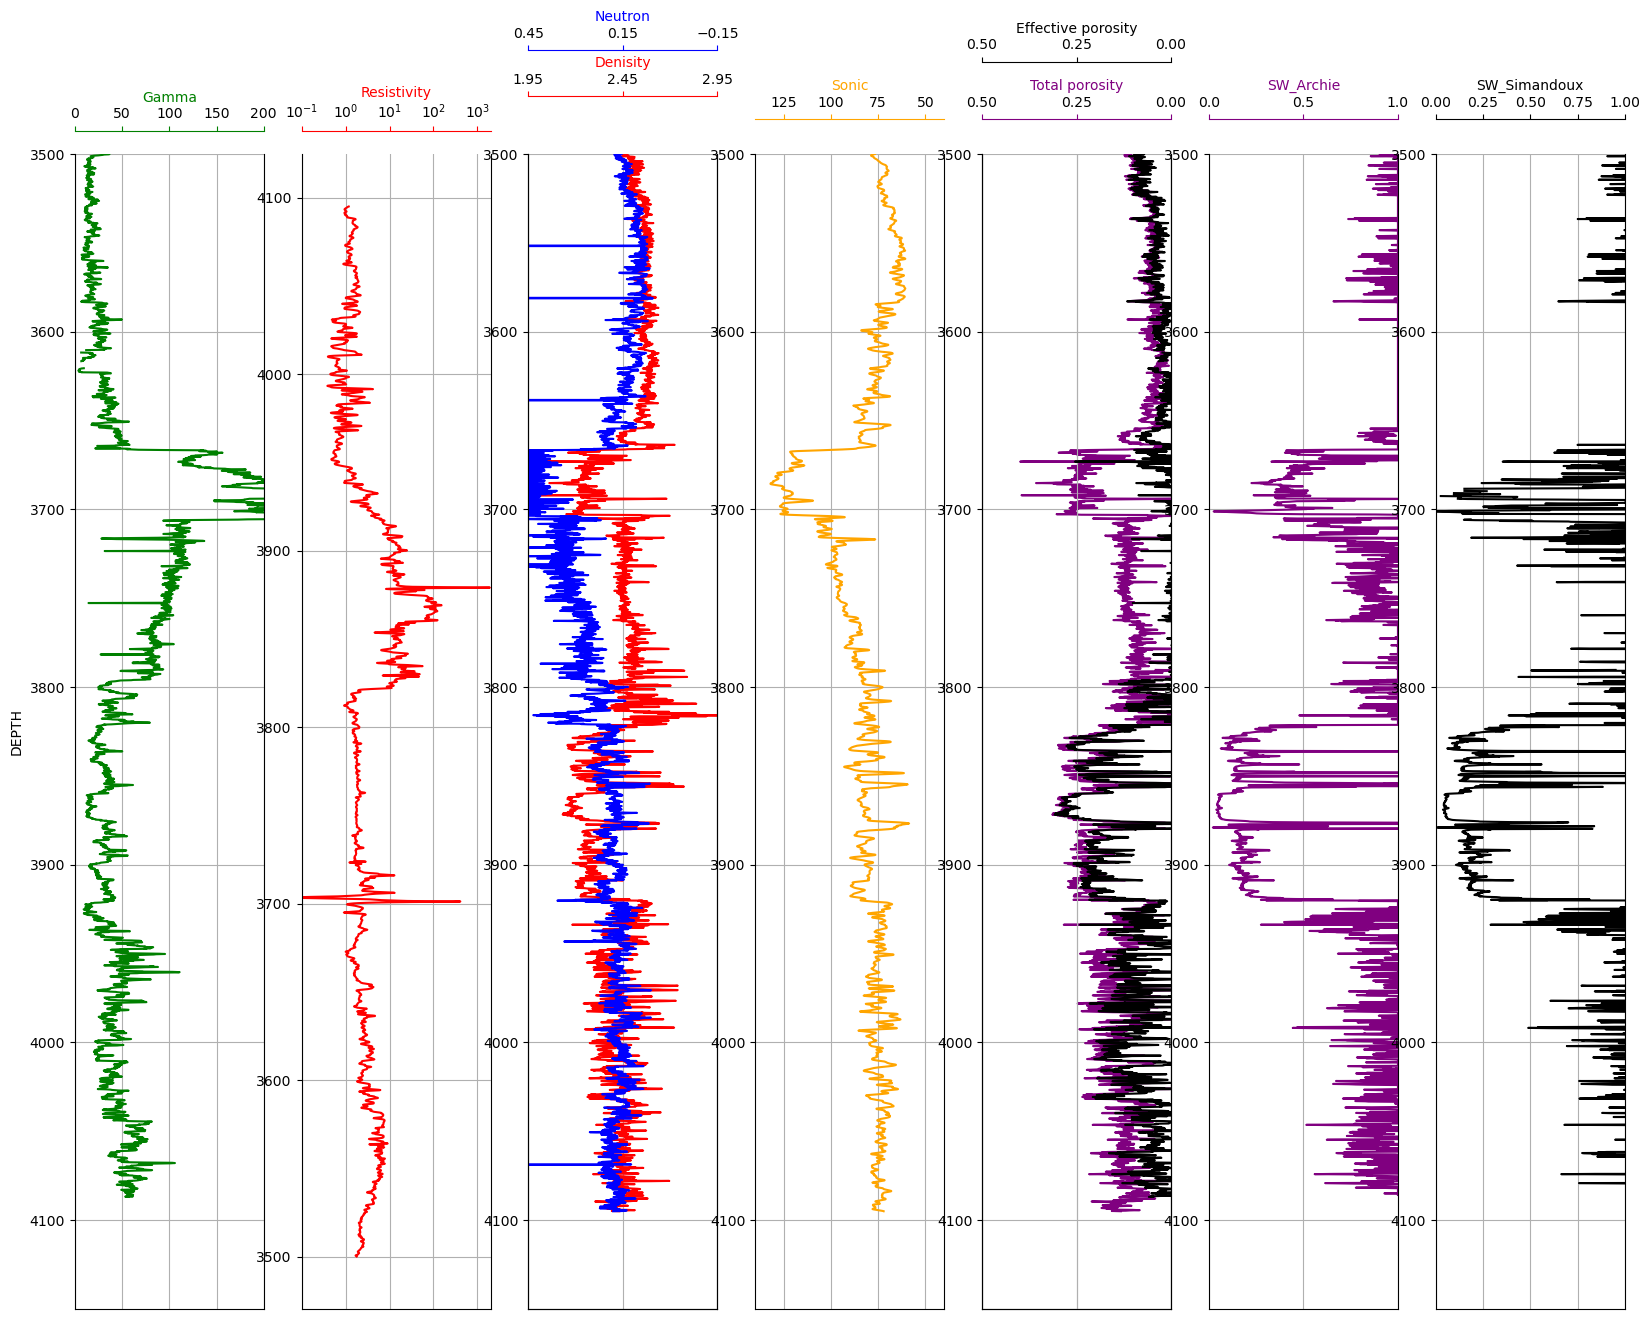

In [80]:
fig,ax=plt.subplots(figsize=(20,15))

ax1=plt.subplot2grid((1,7) , (0,0) , rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,7) , (0,1) , rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,7) , (0,2) , rowspan=1 , colspan=1)
ax4=plt.subplot2grid((1,7) , (0,3) , rowspan=1 , colspan=1)
ax5=ax3.twiny() #Denisty track with neutron
ax6=plt.subplot2grid((1,7) , (0,4) , rowspan=1 , colspan=1)
ax7=ax6.twiny() #prosity track with total PHI
ax8=plt.subplot2grid((1,7) , (0,5) ,rowspan=1 , colspan=1 )
ax9=plt.subplot2grid((1,7) , (0,6) , rowspan=1 , colspan=1)

#GR Plot
ax1.plot("GR" , "DEPTH" , data=df5 , color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("Green")
ax1.set_xlim(0,200)
ax1.set_ylabel("DEPTH")
ax1.xaxis.set_label_position("top")

ax1.tick_params(axis="x" , color="green")
ax1.set_xticks([0, 50, 100, 150, 200])
ax1.xaxis.set_ticks_position("top")
ax1.set_ylim(4150,3500)

ax1.spines["top"].set_edgecolor("green")
ax1.spines["top"].set_position(("axes" , 1.02))

ax1.grid()

#Resistivity log
ax2.plot("RT" , "DEPTH" , data=df5 , color="red")
ax2.set_xlim(0.2,2000)
ax2.semilogx()
ax2.set_xlabel("Resistivity")
ax2.xaxis.set_label_position("top")
ax2.xaxis.label.set_color("red")

ax2.tick_params(axis="x" , color="red")
ax2.set_xticks([0.1 , 1 , 10 , 100 , 1000])
ax2.xaxis.set_ticks_position("top")
ax3.set_ylim(4150,3500)

ax2.spines["top"].set_edgecolor("red")
ax2.spines["top"].set_position(("axes" , 1.02))

ax2.grid()

#Denisty log 

ax3.plot("RHOB" , "DEPTH" , data=df5 , color="red")
ax3.set_xlabel("Denisity")
ax3.set_xlim(1.95 , 2.95)
ax3.xaxis.label.set_color("red")
ax3.xaxis.set_label_position("top")
ax3.set_ylim(4150,3500)

ax3.tick_params(axis="x" , color="red")
ax3.xaxis.set_ticks_position("top")
ax3.set_xticks([1.95 , 2.45 , 2.95])

ax3.spines["top"].set_edgecolor("red")
ax3.spines["top"].set_position(("axes" , 1.05))
ax3.grid()

#sonic track 
ax4.plot("DT" , "DEPTH" , data=df5 , color="orange")
ax4.set_xlabel("Sonic")
ax4.xaxis.set_label_position("top")
ax4.xaxis.label.set_color("orange")
ax4.set_ylim(4150,3500)
ax4.set_xlim(140,40)

ax4.tick_params(axis="x" , color="orange")
ax4.xaxis.set_ticks_position("top")

ax4.spines["top"].set_edgecolor("orange")
ax4.spines["top"].set_position(("axes" , 1.03))
ax4.grid()

#neutron 
ax5.plot("NPHI" , "DEPTH" , data=df5 , color="blue")
ax5.set_xlabel("Neutron")
ax5.set_xlim(0.45 , -0.15)
ax5.set_ylim(4150,3500)
ax5.xaxis.label.set_color("blue")
ax5.xaxis.set_label_position("top")

ax5.tick_params(axis="x" , color="blue")
ax5.set_xticks([0.45 , 0.15 , -0.15])
ax5.xaxis.set_ticks_position("top")

ax5.spines["top"].set_edgecolor("blue")
ax5.spines["top"].set_position(("axes" , 1.09))

#Porosity track (total porosity)

ax6.plot("PHI" , "DEPTH" , data=df5 , color="purple")
ax6.set_xlabel("Total porosity")
ax6.xaxis.set_label_position("top")
ax6.set_xlim(0.5,0)
ax6.xaxis.label.set_color("purple")
ax6.set_ylim(4150,3500)

ax6.tick_params(axis="x" , color="purple")
ax6.set_xticks([0, 0.25, 0.5])
ax6.xaxis.set_ticks_position("top")

ax6.spines["top"].set_edgecolor("purple")
ax6.spines["top"].set_position(("axes", 1.03))
ax6.grid()

#Effective porosity track

ax7.plot("PHIECALC" , "DEPTH" , data=df5 , color="black")
ax7.set_xlabel("Effective porosity")
ax7.xaxis.set_label_position("top")
ax7.xaxis.label.set_color("black")
ax7.set_xlim(0.5,0)
ax7.set_ylim(4150,3500)

ax7.tick_params(axis="x" , color="black")
ax7.set_xticks([0, 0.25, 0.5])
ax7.xaxis.set_ticks_position("top")

ax7.spines["top"].set_edgecolor("black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.grid()

#SW-Archie track 
ax8.plot("SW_LIM" , "DEPTH" , data=df5 , color="purple")
ax8.set_xlabel("SW_Archie")
ax8.xaxis.label.set_color("purple")
ax8.xaxis.set_label_position("top")
ax8.set_ylim(4150,3500)
ax8.set_xlim(0,1)

ax8.tick_params(axis="x" , color="purple")
ax8.set_xticks([0, 0.5, 1])
ax8.xaxis.set_ticks_position("top")
ax8.spines["top"].set_edgecolor("purple")
ax8.spines["top"].set_position(("axes" , 1.03))
ax8.grid()

#SW_Simandoux track
ax9.plot("SW_SIM" , "DEPTH" , data=df5 , color="black")
ax9.set_xlabel("SW_Simandoux")
ax9.xaxis.label.set_color("black")
ax9.xaxis.set_label_position("top")
ax9.set_xlim(0,1)
ax9.set_ylim(4150,3500)
ax9.tick_params(axis="x" , color="black")
ax9.xaxis.set_ticks_position("top")
ax9.spines["top"].set_edgecolor("black")
ax9.spines["top"].set_position(("axes" , 1.03))
ax9.grid()

plt.show()